# MAX Q Illustrated

Computation and plotting of [SpaceX Inspiration 4](https://www.youtube.com/watch?v=3pv01sSq44w) telemetry below 80km to illustrate "max q".


In [79]:
import csv
from ambiance import Atmosphere
%matplotlib inline
import matplotlib.pyplot as plt

## Read CSV and compute stuff

In [80]:
data = []
with open('inspiration4.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    _ = next(csvreader) # skip header
    prev_v = 0
    prev_t = 0
    for row in csvreader:
        t, v, h = row
        t = float(t)                   # time (seconds)
        v = float(v) * 1000 / 3600     # speed (m/s)
        h = float(h) * 1000            # altitude (m)
        # limit to data below 80km 
        if h < 80000:
            atmo = Atmosphere(h)
            rho = atmo.density             # air density (kg/m3)
            a = atmo.speed_of_sound        # speed of sound (m/s)
            M = v / a                      # mach (-)
            q = 0.5 * rho * v * v          # dynamic pressure (Pa)
            dv = v - prev_v
            dt = t - prev_t
            G = 0
            if dt > 0:
                G = dv / dt                # derived acceleration (m/s^2)
                G /= 9.8                   # G's (based on 9.8 m/s^2)
                prev_v = v
                prev_t = t
            data.append([t, h, v, rho, q, M, G])

## Altitude vs. Time

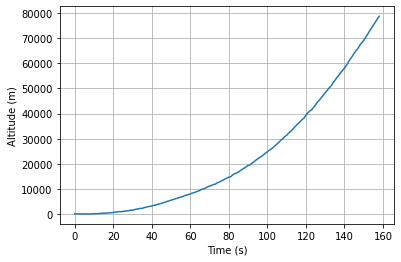

In [81]:
t = [_[0] for _ in data]
h = [_[1] for _ in data]
plt.plot(t, h)
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.grid()
plt.savefig("h_v_t.jpg")

## Speed vs. Time

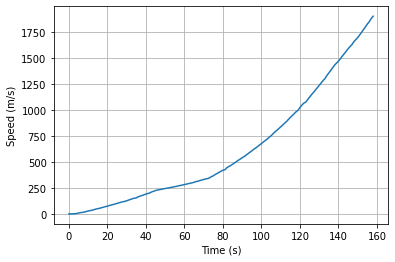

In [82]:
v = [_[2] for _ in data]
plt.plot(t, v)
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.grid()
plt.savefig("v_v_t.jpg")

## Q vs. Time

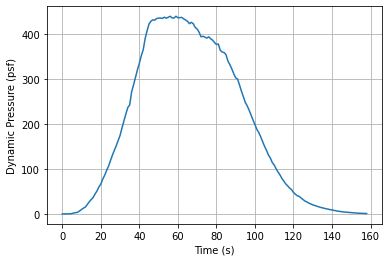

In [83]:
q = [_[4] / 47.88 for _ in data]  # converted to psf
plt.plot(t, q)
plt.xlabel("Time (s)")
plt.ylabel("Dynamic Pressure (psf)")
plt.grid()
plt.savefig("q_v_t.jpg")

## Q vs. Altitude

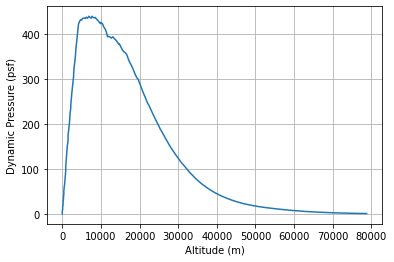

In [84]:
plt.plot(h, q)
plt.xlabel("Altitude (m)")
plt.ylabel("Dynamic Pressure (psf)")
plt.grid()
plt.savefig("q_v_h.jpg")

## Mach vs. Time

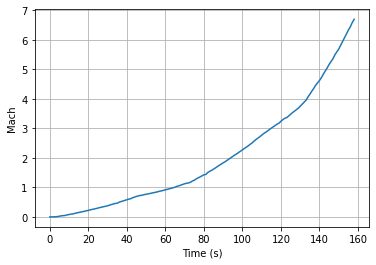

In [85]:
M = [_[5] for _ in data]
plt.plot(t, M)
plt.xlabel("Time (s)")
plt.ylabel("Mach")
plt.grid()
plt.savefig("m_v_t.jpg")

## G's vs. Time

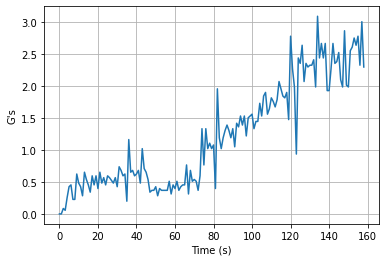

In [86]:
G = [_[6] for _ in data]
plt.plot(t, G)
plt.xlabel("Time (s)")
plt.ylabel("G's")
plt.grid()
plt.savefig("g_v_t.jpg")